# Final Project

In [171]:
# Loading libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

In [148]:
# Loading data

data_train = pd.read_csv ("data/features.csv")
data_test = pd.read_csv ("data/features_test.csv")

In [149]:
# Deleting features that contain match results,
y = data_train.iloc[:,104]
data_cols_names = list(data_train.columns.values)

data_train = data_train.iloc[:,:103]
print (data_cols_names[104])

radiant_win


In [150]:
# Looking at columns that contain missing values in train data

empties = (data_train.count()!=data_train.shape[0])
missing_cols_names = list(data_train.loc[:,empties].columns.values)
print ("Number of missing columns",sum(empties))
print (missing_cols_names)

Number of missing columns 12
['first_blood_time', 'first_blood_team', 'first_blood_player1', 'first_blood_player2', 'radiant_bottle_time', 'radiant_courier_time', 'radiant_flying_courier_time', 'radiant_first_ward_time', 'dire_bottle_time', 'dire_courier_time', 'dire_flying_courier_time', 'dire_first_ward_time']


In [151]:
# Looking at columns that contain missing values in test data

empties = (data_test.count()!=data_test.shape[0])
missing_cols_names = list(data_test.loc[:,empties].columns.values)
print ("Number of missing columns",sum(empties))
print (missing_cols_names)

Number of missing columns 12
['first_blood_time', 'first_blood_team', 'first_blood_player1', 'first_blood_player2', 'radiant_bottle_time', 'radiant_courier_time', 'radiant_flying_courier_time', 'radiant_first_ward_time', 'dire_bottle_time', 'dire_courier_time', 'dire_flying_courier_time', 'dire_first_ward_time']


In [152]:
# Filling NAs with zeros

data_train = data_train.fillna(value=0)
data_test = data_test.fillna(value=0)



In [169]:
# Cross Validation with different number of trees

X_cross = KFold(data_train.shape[0],n_folds=5,random_state=42, shuffle =True)

estim_pars = np.arange(10,80,10)

scores_arr = []

for n_trees in estim_pars:
    clf = GradientBoostingClassifier (n_estimators = n_trees)
    scores = cross_val_score (clf, data_train, y, cv = X_cross, scoring='roc_auc')
    scores_arr.append(scores.mean())
    print ("num trees:",n_trees," score:",scores.mean())


In [170]:
print (scores_arr)

[0.66485069327216473, 0.68246188104131489, 0.69000646786084108, 0.69403872133401134, 0.6974943598879767, 0.70011931355530144, 0.70211654251275879]


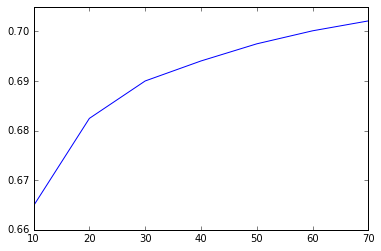

In [173]:
plt.plot(estim_pars, scores_arr)
plt.show()

In [177]:
# Estimating time needed to build 30 trees

import time
import datetime

n_trees = 30

start_time = datetime.datetime.now()

clf = GradientBoostingClassifier (n_estimators = n_trees)
scores = cross_val_score (clf, data_train, y, cv = X_cross, scoring='roc_auc')

print ('Time elapsed:', datetime.datetime.now() - start_time)

Time elapsed: 0:02:05.539000
